In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from random import choice
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Task 1: Coin-flipping

### 1.

for a random coin from 10, the probability of picking the unfair one is $\frac{1}{10} = 0.1 \sim 10\%$

### 2.
the probability of getting tails is $$P({\text{1 tails}}) = P_{\text{coin is fair}}*P_{\text{tails,fair}} + P_{\text{coin is unfair}}*P_{\text{tails,unfair}} = 0.9*0.5+0.1*1 = 0.55$$

### 3.
using Bayes' theorem, we have:
$$ P(\text{unfair | 1 tails}) = \frac{P(\text{1 tails | unfair})*P(\text{unfair})}{P(\text{1 tails})} = \frac{1/10}{0.55} = \frac{2}{11} \sim 18.2\%$$

### 4.

In [2]:
n_trials = int(1e6) # do a million trials
n_unfair = 0
n_tails = 0
for i in range(n_trials):
    # toss 9 fair and one unfair coins. Heads = 0, Tails = 1, Unfair = 10 (to make it easier to find)
    toss_w_unfair = np.concatenate((np.random.randint(0, 2, 9).flatten(),10),axis=None) 
    choose = choice(list(toss_w_unfair)) # choose one of the 10 coins
    if choose != 0: # is it tails?
        n_tails += 1 # if so, increment tails
        if choose == 10: # is it the unfair coin?
            n_unfair += 1 # if so, increment unfair
        
n_unfair/n_tails # what is the probability of the coin being unfair if we get tails?

0.18085522877542734

## Task 2: 
## 1.

In [3]:
data = pd.read_csv('../../notebooks/data/us_marriages_divorces.csv')
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [4]:
data = data.dropna() # drop rows with missing values

In [5]:
year = data['Year'].to_numpy()
marriages = data['Marriages'].to_numpy()
divorces = data['Divorces'].to_numpy()
population = data['Population'].to_numpy()
marr_per_1000 = data['Marriages_per_1000'].to_numpy()
div_per_1000 = data['Divorces_per_1000'].to_numpy()

## 2. & 3.

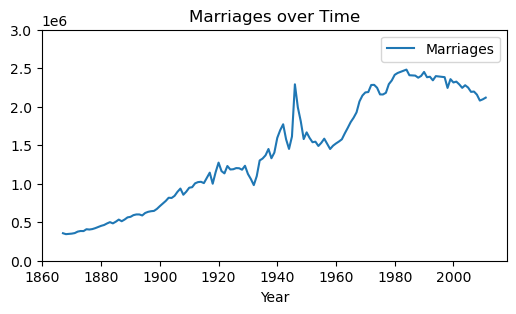

year with max no. of marriages: 1946



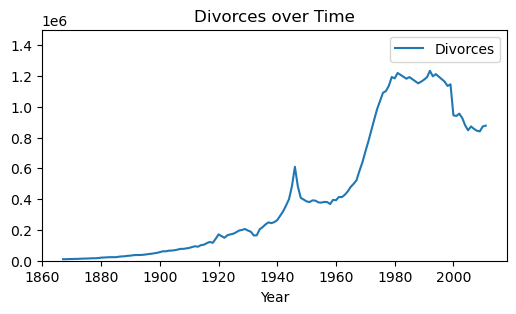

year with max no. of divorces: 1979


In [6]:
ax1 = data.plot(x='Year', y='Marriages', figsize=(6, 3), title='Marriages over Time',ylim=(0, 3e6))
plt.show()
print(f"year with max no. of marriages: {year[np.argmax(marr_per_1000)]}\n")

ax2 = data.plot(x='Year', y='Divorces', figsize=(6, 3), title='Divorces over Time',ylim=(0, 1.5e6))
plt.show()
print(f"year with max no. of divorces: {year[np.argmax(div_per_1000)]}")

## 4.

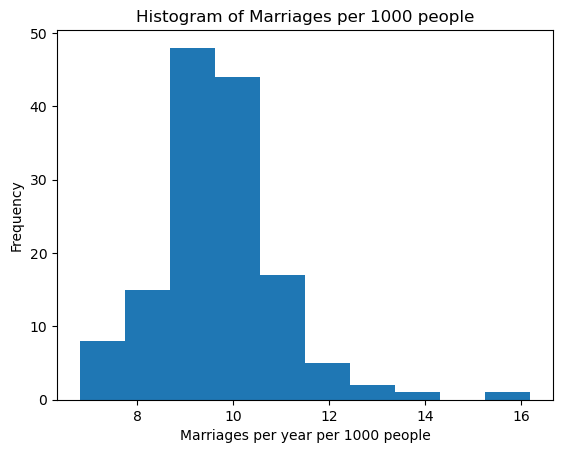

mean = 9.6354609929078
median = 9.6
std. dev. = 1.3144658733365389
nmad = 1.1860799999999982


In [7]:
plt.hist(marr_per_1000, bins=10)
plt.title('Histogram of Marriages per 1000 people')
plt.xlabel('Marriages per year per 1000 people')
plt.ylabel('Frequency')
plt.show()

mean, median, std = np.mean(marr_per_1000), np.median(marr_per_1000), np.std(marr_per_1000)
nmad = 1.4826 * np.median(np.abs(marr_per_1000 - median))

print(f"mean = {mean}\nmedian = {median}\nstd. dev. = {std}\nnmad = {nmad}")

## 5.

In [8]:
avg_pop_30s = np.mean(population[(year < 1940) & (year >= 1930)])
avg_pop_00s = np.mean(population[(year < 2010) & (year >= 2000)])

print(f"average population in 1930s: {avg_pop_30s:2.4e}\naverage population in 2000s: {avg_pop_00s:2.4e}")

average population in 1930s: 1.2700e+08
average population in 2000s: 2.9478e+08


## 6.

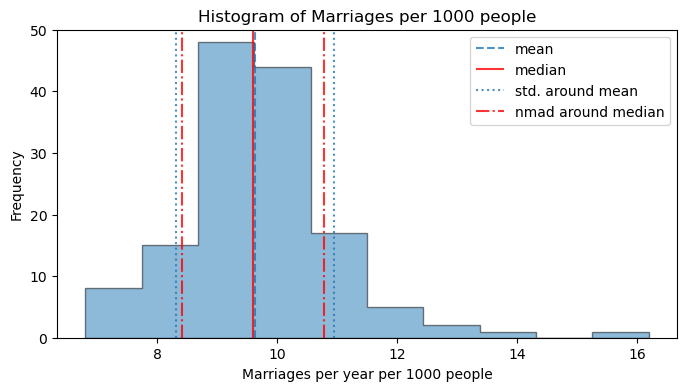

In [9]:
figure = plt.figure(figsize=(8, 4))
plt.hist(marr_per_1000, bins=10,color="C0", alpha=0.5, edgecolor = "black", histtype='stepfilled')
plt.vlines(mean, 0, 60, color="C0", alpha = 0.8, label="mean", linestyles="dashed")
plt.vlines(median, 0, 60, color="red", alpha = 0.8, label="median", linestyles="solid")
plt.vlines([mean + std,mean - std], 0, 60, color="C0", alpha = 0.8, label="std. around mean", linestyles="dotted")
plt.vlines([median + nmad,median - nmad], 0, 60, color="red", alpha = 0.8, label="nmad around median", linestyles="dashdot")

plt.title('Histogram of Marriages per 1000 people')
plt.xlabel('Marriages per year per 1000 people')
plt.ylabel('Frequency')

plt.ylim(0, 50)
plt.legend()
plt.show()